# Hyper parameter tuning
## Part 3: Best Model architecture and hyperparameters

> We have experimented with six different archiectures of CNN and a range of hyperparameters and their values. Here, we will build six models based on the best hyperparameters. Finally, we will decide on the best model architectuer and the values of hyperparameters

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from os import walk
import time
import regex as re
import os
import glob
import tensorflow as tf
import pandas as pd
import warnings
import matplotlib
import h5py
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

#### GPU configuration

In [2]:
import warnings

if not tf.test.gpu_device_name():
    warnings.warn("No GPU found")
else:
    print("Default GPU device: {}".format(tf.test.gpu_device_name()))
    
print("Num Devices Available: ", len(tf.config.experimental.list_physical_devices()))
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

Default GPU device: /device:GPU:0
Num Devices Available:  2
Num CPUs Available:  1
Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18396885793463053931
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2909195470
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14621236913820412343
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


# Reading Hypyer parameter values from Text Files

## 1) Basic Model 1c1p1f1d1d

In [3]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
dense_1_units = []
activation_1_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/1c1p1f1d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride), len(dense_1_units), 
      len(activation_1_dense), len(learning_rate), len(Score))

############# create data frame
df_1c1p1f1d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      dense_1_units, activation_1_dense, learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol_stride',
                         'Dense1_units', 'Dense1_activation', 'learning_rate','Score'])
############ Df head
print(df_1c1p1f1d1d.shape)
df_1c1p1f1d1d.head(10)

30 30 30 30 30 30 30 30
(30, 8)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol_stride,Dense1_units,Dense1_activation,learning_rate,Score
0,64,7,relu,2,160,relu,0.01,0.9823911190032959
1,64,5,relu,2,160,relu,0.0001,0.9740500450134277
2,64,7,relu,8,224,relu,0.01,0.9684893488883972
3,64,3,tanh,2,224,relu,0.01,0.9684893488883972
4,96,7,relu,8,224,tanh,0.0001,0.9684893488883972
5,48,7,tanh,10,160,tanh,0.001,0.9675625562667847
6,96,7,relu,8,224,tanh,0.0001,0.960148274898529
7,48,5,elu,4,160,relu,0.001,0.9564411640167236
8,64,5,relu,2,160,relu,0.0001,0.9527339935302734
9,64,7,relu,8,224,relu,0.01,0.949026882648468


## Basic Model 1c1p1f2d1d

In [4]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
dense_1_units = []
activation_1_dense = []
dense_2_units = []
activation_2_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/1c1p1f2d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'dense_2_units' in line:
        #print(line.split()[1])
        dense_2_units.append(line.split()[1])
    elif'activation_2_dense' in line:
        #print(line.split()[1])
        activation_2_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride), len(dense_1_units), 
      len(activation_1_dense),len(dense_2_units), len(activation_2_dense), len(learning_rate), len(Score))

############# create data frame
df_1c1p1f2d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      dense_1_units, activation_1_dense, dense_2_units, activation_2_dense,
                                      learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol_stride',
                         'Dense1_units', 'Dense1_activation','Dense2_units', 'Dense2_activation', 
                         'learning_rate','Score'])
############ Df head
print(df_1c1p1f2d1d.shape)
df_1c1p1f2d1d.head(10)

30 30 30 30 30 30 30 30 30 30
(30, 10)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol_stride,Dense1_units,Dense1_activation,Dense2_units,Dense2_activation,learning_rate,Score
0,64,7,relu,2,160,relu,224,tanh,0.001,0.9777571558952332
1,48,7,relu,8,160,relu,32,tanh,0.001,0.9768304228782654
2,64,5,elu,6,160,tanh,224,tanh,0.0001,0.9759036302566528
3,48,7,relu,8,160,relu,32,tanh,0.001,0.9740500450134277
4,96,3,elu,8,224,tanh,160,tanh,0.0001,0.958294689655304
5,48,7,relu,8,160,relu,32,tanh,0.001,0.9564411640167236
6,32,5,tanh,10,96,tanh,96,relu,0.001,0.949026882648468
7,96,3,elu,8,224,tanh,160,tanh,0.0001,0.9416126012802124
8,96,5,elu,12,160,relu,160,relu,0.0001,0.9388322234153748
9,32,5,tanh,10,96,tanh,96,relu,0.001,0.9369786977767944


## 3) Basic Model 2c2p1f1d1d

In [5]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
conv_2_filter = []
conv_2_kernel = []
activation_2_conv = []
MaxPol_2_stride = []
dense_1_units = []
activation_1_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/2c2p1f1d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif 'conv_2_filter:' in line:
        #print(line.split()[1])
        conv_2_filter.append(line.split()[1])
    elif'conv_2_kernel' in line:
        #print(line.split()[1])
        conv_2_kernel.append(line.split()[1])
    elif'activation_2_conv' in line:
        #print(line.split()[1])
        activation_2_conv.append(line.split()[1])
    elif'MaxPol_2_stride' in line:
        #print(line.split()[1])
        MaxPol_2_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride),
      len(conv_2_filter), len(conv_2_kernel), len(activation_2_conv), len(MaxPol_2_stride), 
      len(dense_1_units), len(activation_1_dense), len(learning_rate), len(Score))

############# create data frame
df_2c2p1f1d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      conv_2_filter, conv_2_kernel, activation_2_conv, MaxPol_2_stride,
                                      dense_1_units, activation_1_dense, learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol1_stride',
                         'Conv2_filters', 'Conv2_kernel', 'Conv2_activation','Maxpol2_stride',
                         'Dense1_units', 'Dense1_activation', 'learning_rate','Score'])
############ Df head
print(df_2c2p1f1d1d.shape)
df_2c2p1f1d1d.head(10)

30 30 30 30 30 30 30 30 30 30 30 30
(30, 12)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol1_stride,Conv2_filters,Conv2_kernel,Conv2_activation,Maxpol2_stride,Dense1_units,Dense1_activation,learning_rate,Score
0,32,7,relu,6,80,5,tanh,4,224,tanh,0.001,0.9805375337600708
1,96,3,tanh,4,96,3,relu,4,224,tanh,0.0001,0.9731232523918152
2,64,7,relu,2,48,7,tanh,10,160,tanh,0.001,0.9721964597702026
3,80,7,elu,6,64,5,tanh,4,224,tanh,0.0001,0.9684893488883972
4,80,5,relu,8,64,5,elu,6,224,tanh,0.0001,0.9666357636451721
5,64,7,relu,2,48,7,tanh,10,160,tanh,0.001,0.9620018601417542
6,80,7,elu,6,96,7,tanh,10,96,relu,0.01,0.9564411640167236
7,80,7,elu,6,64,5,tanh,4,224,tanh,0.0001,0.9471732974052429
8,96,5,elu,2,80,7,relu,10,160,relu,0.01,0.9462465047836304
9,48,7,elu,8,64,7,relu,8,224,relu,0.01,0.9341983199119568


## 4)  Basic Model 2c2p1f2d1d

In [6]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
conv_2_filter = []
conv_2_kernel = []
activation_2_conv = []
MaxPol_2_stride = []
dense_1_units = []
activation_1_dense = []
dense_2_units = []
activation_2_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/2c2p1f2d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif 'conv_2_filter:' in line:
        #print(line.split()[1])
        conv_2_filter.append(line.split()[1])
    elif'conv_2_kernel' in line:
        #print(line.split()[1])
        conv_2_kernel.append(line.split()[1])
    elif'activation_2_conv' in line:
        #print(line.split()[1])
        activation_2_conv.append(line.split()[1])
    elif'MaxPol_2_stride' in line:
        #print(line.split()[1])
        MaxPol_2_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'dense_2_units' in line:
        #print(line.split()[1])
        dense_2_units.append(line.split()[1])
    elif'activation_2_dense' in line:
        #print(line.split()[1])
        activation_2_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride),
      len(conv_2_filter), len(conv_2_kernel), len(activation_2_conv), len(MaxPol_2_stride), 
      len(dense_1_units), len(activation_1_dense), 
      len(dense_2_units), len(activation_2_dense),
      len(learning_rate), len(Score))

############# create data frame
df_2c2p1f2d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      conv_2_filter, conv_2_kernel, activation_2_conv, MaxPol_2_stride,
                                      dense_1_units, activation_1_dense, 
                                      dense_2_units, activation_2_dense,
                                      learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol1_stride',
                         'Conv2_filters', 'Conv2_kernel', 'Conv2_activation','Maxpol2_stride',
                         'Dense1_units', 'Dense1_activation',
                         'Dense2_units', 'Dense2_activation',
                         'learning_rate','Score'])
############ Df head
print(df_2c2p1f2d1d.shape)
df_2c2p1f2d1d.head(10)

30 30 30 30 30 30 30 30 30 30 30 30 30 30
(30, 14)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol1_stride,Conv2_filters,Conv2_kernel,Conv2_activation,Maxpol2_stride,Dense1_units,Dense1_activation,Dense2_units,Dense2_activation,learning_rate,Score
0,48,3,relu,2,48,7,tanh,6,96,tanh,96,relu,0.001,0.9759036302566528
1,64,5,relu,6,48,5,tanh,2,160,relu,96,tanh,0.001,0.9749768376350403
2,48,3,relu,2,48,7,tanh,6,96,tanh,96,relu,0.001,0.9740500450134277
3,64,7,relu,2,48,7,tanh,10,160,tanh,224,relu,0.001,0.9731232523918152
4,64,5,relu,6,48,5,tanh,2,160,relu,96,tanh,0.001,0.9684893488883972
5,48,7,relu,6,80,5,tanh,6,96,relu,32,relu,0.01,0.9666357636451721
6,32,5,elu,6,32,3,tanh,4,160,relu,96,relu,0.0001,0.9629286527633667
7,64,7,relu,2,48,7,tanh,10,160,tanh,224,relu,0.001,0.9610750675201416
8,48,7,relu,6,80,5,tanh,6,96,relu,32,relu,0.01,0.9610750675201416
9,48,3,elu,2,80,3,tanh,4,160,tanh,160,relu,0.0001,0.960148274898529


## 5)  Basic Model 3c3p1f1d1d

In [7]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
conv_2_filter = []
conv_2_kernel = []
activation_2_conv = []
MaxPol_2_stride = []
conv_3_filter = []
conv_3_kernel = []
activation_3_conv = []
MaxPol_3_stride = []
dense_1_units = []
activation_1_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/3c3p1f1d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif 'conv_2_filter:' in line:
        #print(line.split()[1])
        conv_2_filter.append(line.split()[1])
    elif'conv_2_kernel' in line:
        #print(line.split()[1])
        conv_2_kernel.append(line.split()[1])
    elif'activation_2_conv' in line:
        #print(line.split()[1])
        activation_2_conv.append(line.split()[1])
    elif'MaxPol_2_stride' in line:
        #print(line.split()[1])
        MaxPol_2_stride.append(line.split()[1])
    elif 'conv_3_filter:' in line:
        #print(line.split()[1])
        conv_3_filter.append(line.split()[1])
    elif'conv_3_kernel' in line:
        #print(line.split()[1])
        conv_3_kernel.append(line.split()[1])
    elif'activation_3_conv' in line:
        #print(line.split()[1])
        activation_3_conv.append(line.split()[1])
    elif'MaxPol_3_stride' in line:
        #print(line.split()[1])
        MaxPol_3_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride),
      len(conv_2_filter), len(conv_2_kernel), len(activation_2_conv), len(MaxPol_2_stride),
      len(conv_3_filter), len(conv_3_kernel), len(activation_3_conv), len(MaxPol_3_stride),
      len(dense_1_units), len(activation_1_dense), len(learning_rate), len(Score))

############# create data frame
df_3c3p1f1d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      conv_2_filter, conv_2_kernel, activation_2_conv, MaxPol_2_stride,
                                      conv_3_filter, conv_3_kernel, activation_3_conv, MaxPol_3_stride,
                                      dense_1_units, activation_1_dense, learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol1_stride',
                         'Conv2_filters', 'Conv2_kernel', 'Conv2_activation','Maxpol2_stride',
                         'Conv3_filters', 'Conv3_kernel', 'Conv3_activation','Maxpol3_stride',
                         'Dense1_units', 'Dense1_activation', 'learning_rate','Score'])
############ Df head
print(df_3c3p1f1d1d.shape)
df_3c3p1f1d1d.head(10)

30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
(30, 16)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol1_stride,Conv2_filters,Conv2_kernel,Conv2_activation,Maxpol2_stride,Conv3_filters,Conv3_kernel,Conv3_activation,Maxpol3_stride,Dense1_units,Dense1_activation,learning_rate,Score
0,64,3,relu,2,32,5,tanh,4,80,3,tanh,2,224,tanh,0.0001,0.9796107411384583
1,64,7,elu,2,80,5,tanh,2,48,2,relu,2,224,tanh,0.0001,0.9786839485168457
2,80,3,relu,2,80,5,relu,2,64,2,relu,2,224,tanh,0.0001,0.9777571558952332
3,64,7,relu,6,32,3,relu,4,80,3,elu,2,96,relu,0.001,0.9749768376350403
4,32,11,relu,8,48,5,elu,4,48,2,elu,2,224,tanh,0.001,0.9731232523918152
5,32,11,relu,8,48,5,elu,4,48,2,elu,2,224,tanh,0.001,0.9703429341316223
6,64,3,relu,2,32,5,tanh,4,80,3,tanh,2,224,tanh,0.0001,0.9703429341316223
7,80,11,relu,2,64,5,relu,4,64,2,elu,2,96,relu,0.001,0.9694161415100098
8,64,7,relu,6,32,3,relu,4,80,3,elu,2,96,relu,0.001,0.9675625562667847
9,32,5,elu,4,48,5,relu,4,64,2,elu,2,96,relu,0.0001,0.9675625562667847


## 6)  Basic Model 3c3p1f2d1d

In [8]:
conv_1_filter = []
conv_1_kernel = []
activation_1_conv = []
MaxPol_1_stride = []
conv_2_filter = []
conv_2_kernel = []
activation_2_conv = []
MaxPol_2_stride = []
conv_3_filter = []
conv_3_kernel = []
activation_3_conv = []
MaxPol_3_stride = []
dense_1_units = []
activation_1_dense = []
dense_2_units = []
activation_2_dense = []
learning_rate = []
Score = []
############ Reading text file
with open('./Hyperparameter_Files/3c3p1f2d1d.txt') as f:
    lines = [line.rstrip() for line in f]
########### iterating over lines and saving hyper parameters  
for line in lines:
    if 'conv_1_filter:' in line:
        #print(line.split()[1])
        conv_1_filter.append(line.split()[1])
    elif'conv_1_kernel' in line:
        #print(line.split()[1])
        conv_1_kernel.append(line.split()[1])
    elif'activation_1_conv' in line:
        #print(line.split()[1])
        activation_1_conv.append(line.split()[1])
    elif'MaxPol_1_stride' in line:
        #print(line.split()[1])
        MaxPol_1_stride.append(line.split()[1])
    elif 'conv_2_filter:' in line:
        #print(line.split()[1])
        conv_2_filter.append(line.split()[1])
    elif'conv_2_kernel' in line:
        #print(line.split()[1])
        conv_2_kernel.append(line.split()[1])
    elif'activation_2_conv' in line:
        #print(line.split()[1])
        activation_2_conv.append(line.split()[1])
    elif'MaxPol_2_stride' in line:
        #print(line.split()[1])
        MaxPol_2_stride.append(line.split()[1])
    elif 'conv_3_filter:' in line:
        #print(line.split()[1])
        conv_3_filter.append(line.split()[1])
    elif'conv_3_kernel' in line:
        #print(line.split()[1])
        conv_3_kernel.append(line.split()[1])
    elif'activation_3_conv' in line:
        #print(line.split()[1])
        activation_3_conv.append(line.split()[1])
    elif'MaxPol_3_stride' in line:
        #print(line.split()[1])
        MaxPol_3_stride.append(line.split()[1])
    elif'dense_1_units' in line:
        #print(line.split()[1])
        dense_1_units.append(line.split()[1])
    elif'activation_1_dense' in line:
        #print(line.split()[1])
        activation_1_dense.append(line.split()[1])
    elif'dense_2_units' in line:
        #print(line.split()[1])
        dense_2_units.append(line.split()[1])
    elif'activation_2_dense' in line:
        #print(line.split()[1])
        activation_2_dense.append(line.split()[1])
    elif'learning_rate' in line:
        #print(line.split()[1])
        learning_rate.append(line.split()[1])
    elif'Score' in line:
        #print(line.split()[1])
        Score.append(line.split()[1])
############# Checking the consistency of the parameters
print(len(conv_1_filter), len(conv_1_kernel), len(activation_1_conv), len(MaxPol_1_stride),
      len(conv_2_filter), len(conv_2_kernel), len(activation_2_conv), len(MaxPol_2_stride),
      len(conv_3_filter), len(conv_3_kernel), len(activation_3_conv), len(MaxPol_3_stride),
      len(dense_1_units), len(activation_1_dense),
      len(dense_2_units), len(activation_2_dense),len(learning_rate), len(Score))

############# create data frame
df_3c3p1f2d1d = pd.DataFrame(list(zip(conv_1_filter, conv_1_kernel, activation_1_conv, MaxPol_1_stride,
                                      conv_2_filter, conv_2_kernel, activation_2_conv, MaxPol_2_stride,
                                      conv_3_filter, conv_3_kernel, activation_3_conv, MaxPol_3_stride,
                                      dense_1_units, activation_1_dense,
                                      dense_2_units, activation_2_dense,learning_rate, Score)),
               columns =['Conv1_filters', 'Conv1_kernel', 'Conv1_activation','Maxpol1_stride',
                         'Conv2_filters', 'Conv2_kernel', 'Conv2_activation','Maxpol2_stride',
                         'Conv3_filters', 'Conv3_kernel', 'Conv3_activation','Maxpol3_stride',
                         'Dense1_units', 'Dense1_activation',
                         'Dense2_units', 'Dense2_activation','learning_rate','Score'])
############ Df head
print(df_3c3p1f2d1d.shape)
df_3c3p1f2d1d.head(10)

30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
(30, 18)


,Conv1_filters,Conv1_kernel,Conv1_activation,Maxpol1_stride,Conv2_filters,Conv2_kernel,Conv2_activation,Maxpol2_stride,Conv3_filters,Conv3_kernel,Conv3_activation,Maxpol3_stride,Dense1_units,Dense1_activation,Dense2_units,Dense2_activation,learning_rate,Score
0,48,9,elu,4,48,3,tanh,2,80,3,relu,2,160,relu,160,tanh,0.0001,0.9759036302566528
1,48,7,elu,2,96,5,relu,4,64,2,tanh,2,96,tanh,224,tanh,0.001,0.9759036302566528
2,80,9,elu,6,32,5,elu,2,48,2,tanh,2,224,relu,160,tanh,0.001,0.9749768376350403
3,64,3,elu,4,96,5,elu,2,80,2,relu,2,160,relu,96,relu,0.001,0.9731232523918152
4,80,7,relu,4,64,3,relu,2,96,3,relu,2,224,tanh,32,tanh,0.001,0.9712696671485901
5,80,7,relu,4,64,3,relu,2,96,3,relu,2,224,tanh,32,tanh,0.001,0.9712696671485901
6,80,9,elu,4,64,5,tanh,2,96,3,relu,2,224,relu,96,tanh,0.001,0.9703429341316223
7,80,5,elu,4,80,3,tanh,2,64,2,tanh,2,224,tanh,32,relu,0.001,0.9703429341316223
8,64,3,elu,4,96,5,elu,2,80,2,relu,2,160,relu,96,relu,0.001,0.9666357636451721
9,80,5,elu,4,80,3,tanh,2,64,2,tanh,2,224,tanh,32,relu,0.001,0.9657089710235596


__Read HDF5 Dataset__

In [9]:
def read_many_hdf5(num_images, file_path):
    """ Reads image from HDF5.
        Parameters:
        ---------------
        num_images   number of images to read

        Returns:
        ----------
        images      images array, (N, 32, 32, 3) to be stored
        labels      associated meta data, int label (N, 1)
    """
    images, labels = [], []

    # Open the HDF5 file
    file = h5py.File(file_path, "r+")

    images = np.array(file["/images"]).astype("uint8")
    labels = np.array(file["/meta"]).astype("uint8")

    return images, labels

# Model based on the best hyper parameter values

## 1) Basic Model 1c1p1f1d1d

In [10]:
def model_1c1p1f1d1d():
    
    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same', activation='relu', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(320, activation=tf.nn.relu, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.01),
                  metrics=['accuracy'])

    print(model.summary())
    return model

## 2) Basic Model 1c1p1f2d1d

In [11]:
def model_1c1p1f2d1d():

    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=8))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(418, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['accuracy'])

    print(model.summary())
    return model

## 3) Basic Model 2c2p1f1d1d

In [12]:
def model_2c2p1f1d1d():
    
    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='tanh', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=4))
    model.add(tf.keras.layers.Conv2D(filters=96, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(strides=4))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(448, activation=tf.nn.tanh, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['accuracy'])

    print(model.summary())
    return model

## 4) Basic Model 2c2p1f2d1d

In [13]:
def model_2c2p1f2d1d():
    
    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same', activation='relu', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=6))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(320, activation=tf.nn.tanh, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(448, activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['accuracy'])

    print(model.summary())
    return model

## 5) Basic Model 3c3p1f1d1d

In [14]:
def model_3c3p1f1d1d():
    
    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(448, activation=tf.nn.tanh, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.0001),
                  metrics=['accuracy'])

    print(model.summary())
    return model

## 6) Basic Model 3c3p1f2d1d

In [15]:
def model_3c3p1f2d1d():
    
    np.random.seed(786)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='tanh', input_shape=(190, 150,1)))
    model.add(tf.keras.layers.MaxPool2D(strides=4))
    model.add(tf.keras.layers.Conv2D(filters=80, kernel_size=(3, 3), padding='same', activation='elu'))
    model.add(tf.keras.layers.MaxPool2D(strides=4))
    model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(2, 2), padding='same', activation='tanh'))
    model.add(tf.keras.layers.MaxPool2D(strides=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(28500,)))
    model.add(tf.keras.layers.Dense(384, activation=tf.nn.tanh))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    # We will now compile and print out a summary of our model
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.keras.optimizers.Adam(0.001),
                  metrics=['accuracy'])

    print(model.summary())
    return model

In [16]:
def loss_accuracy_curves(history):
    ############### printing accuracy and loss between the epoches #########
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'], label="Training")
    plt.plot(history.history['val_accuracy'], label ="Validation")
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'], label="Training")
    plt.plot(history.history['val_loss'], label ="Validation")
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Preprocessing Images

__Ostu Binarisation__

In [17]:
def ostu_thd(XX):
    rnd_images = []
    for img in XX:
        #img = rgb2gray(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Otsu's thresholding
        ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        rnd_images.append(th2)
    test_images = np.array(rnd_images)
    
    return test_images

### Train and Test Split + Reshaping Data to adjust greyscal dimension

In [18]:
from sklearn.model_selection import train_test_split

def pre_process(X, y):
    
    # test_size is the test size of the total dataset, random_state controls the shuffling of data. same state returns same data always.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=786, stratify=y) 
    print("Total training intences: " + str(len(y_train)))
    print("Train Data:" + str(np.unique(y_train, return_counts=True)))
    print("Total testing intences: " + str(len(y_test)))
    print("Test Data:" + str(np.unique(y_test, return_counts=True)))

    print("Before Reshaping the shape of train and test dataset:")
    print(X_train.shape)
    print(X_test.shape)
    # reshape to be [samples][width][height][channels]
    X_train = X_train.reshape((X_train.shape[0], 190, 150, 1))
    X_test = X_test.reshape((X_test.shape[0], 190, 150, 1))
    print("After Reshaping the shape of train and test dataset:")
    print(X_train.shape)
    print(X_test.shape)
    
    # Convert the array to float32 as opposed to uint8
    X_train = X_train.astype(np.float32)
    X_test = X_test.astype(np.float32)

    # Convert the pixel values from integers between 0 and 255 to floats between 0 and 1
    X_train /= 255
    X_test /=  255

    NUM_DIGITS = 2

    print("Before", y_train[0]) # The format of the labels before conversion

    y_train  = tf.keras.utils.to_categorical(y_train, NUM_DIGITS)

    print("After", y_train[0]) # The format of the labels after conversion

    y_test = tf.keras.utils.to_categorical(y_test, NUM_DIGITS)
    
    return X_train, X_test, y_train, y_test

# Main Execution Body
## 1. Model 1

In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_1c1p1f1d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history1 = model1.fit(X_train, y_train, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history1)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history1)

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 150, 64)      3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 75, 64)       0         
 )                                                               
     

ResourceExhaustedError:  OOM when allocating tensor with shape[456000,320] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential/dense/MatMul/MatMul_1
 (defined at D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:464)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_732]

Errors may have originated from an input operation.
Input Source operations connected to node gradient_tape/sequential/dense/MatMul/MatMul_1:
In[0] sequential/flatten/Reshape (defined at D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\layers\core\flatten.py:96)	
In[1] gradient_tape/sequential/dense/ReluGrad:

Operation defined at: (most recent call last)
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
>>>     app.start()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
>>>     self.io_loop.start()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
>>>     await result
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
>>>     res = shell.run_cell(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Temp\ipykernel_1188\1875952324.py", line 21, in <cell line: 21>
>>>     history1 = model1.fit(X_train, y_train, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 816, in train_step
>>>     self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 530, in minimize
>>>     grads_and_vars = self._compute_gradients(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 583, in _compute_gradients
>>>     grads_and_vars = self._get_gradients(tape, loss, var_list, grad_loss)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 464, in _get_gradients
>>>     grads = tape.gradient(loss, var_list, grad_loss)
>>> 

## 2. Model 2

In [20]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_1c1p1f2d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history2 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history2)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history2)

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 190, 150, 80)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 80)       0         
 2D)                                                             
   

ResourceExhaustedError:  OOM when allocating tensor with shape[10,80,190,150] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node sequential_1/conv2d_1/Conv2D
 (defined at D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\layers\convolutional.py:231)
]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_test_function_2756]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_1/conv2d_1/Conv2D:
In[0] IteratorGetNext (defined at D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py:1355)	
In[1] sequential_1/conv2d_1/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\traitlets\config\application.py", line 976, in launch_instance
>>>     app.start()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
>>>     self.io_loop.start()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 596, in run_forever
>>>     self._run_once()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\base_events.py", line 1890, in _run_once
>>>     handle._run()
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Programs\Python\Python39\lib\asyncio\events.py", line 80, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
>>>     await self.process_one()
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
>>>     await dispatch(*args)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
>>>     await result
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
>>>     reply_content = await reply_content
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\ipkernel.py", line 383, in do_execute
>>>     res = shell.run_cell(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
>>>     return super().run_cell(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 2936, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3135, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3338, in run_ast_nodes
>>>     if await self.run_code(code, result, async_=asy):
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\IPython\core\interactiveshell.py", line 3398, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "C:\Users\ayub_\AppData\Local\Temp\ipykernel_1188\1653423558.py", line 21, in <cell line: 21>
>>>     history2 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1252, in fit
>>>     val_logs = self.evaluate(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1537, in evaluate
>>>     tmp_logs = self.test_function(iterator)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1366, in test_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1356, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1349, in run_step
>>>     outputs = model.test_step(data)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\training.py", line 1303, in test_step
>>>     y_pred = self(x, training=False)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\layers\convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "D:\UoH_PhD_Exp\my_ve_env\lib\site-packages\keras\layers\convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

## 3. Model 3

In [21]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_2c2p1f1d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history3 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history3)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history3)

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 190, 150, 96)      960       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 48, 38, 96)       0         
 2D)                                                             
   

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

## 4. Model 4

In [22]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_2c2p1f2d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history4 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history4)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history4)

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 190, 150, 64)      3200      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 25, 64)       0         
 2D)                                                             
   

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

## 5. Model 5

In [23]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_3c3p1f1d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history5 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history5)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history5)

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]


ResourceExhaustedError: OOM when allocating tensor with shape[26496,448] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:RandomUniform]

## 6. Model 6

Total X intences: (5135, 190, 150, 3)
Total y intences: 5135
Total Non porosity images: 2578
Total porosity images: 2557
X Shape after Ostu Binarisation: (5135, 190, 150)
Total training intences: 3594
Train Data:(array([0, 1], dtype=uint8), array([1804, 1790], dtype=int64))
Total testing intences: 1541
Test Data:(array([0, 1], dtype=uint8), array([774, 767], dtype=int64))
Before Reshaping the shape of train and test dataset:
(3594, 190, 150)
(1541, 190, 150)
After Reshaping the shape of train and test dataset:
(3594, 190, 150, 1)
(1541, 190, 150, 1)
Before 1
After [0. 1.]
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 190, 150, 32)      832       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 48, 38, 32)       0         
 2D)                                                             
   

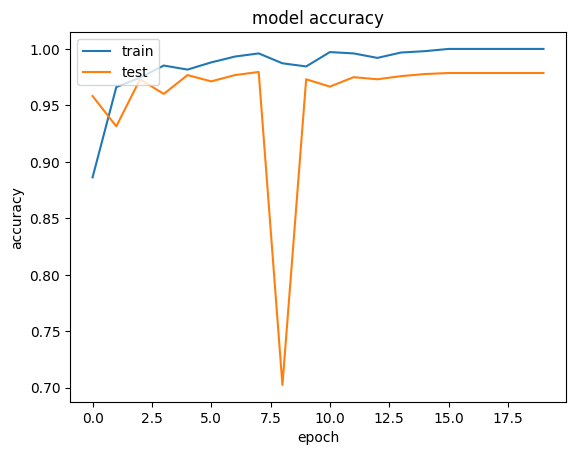

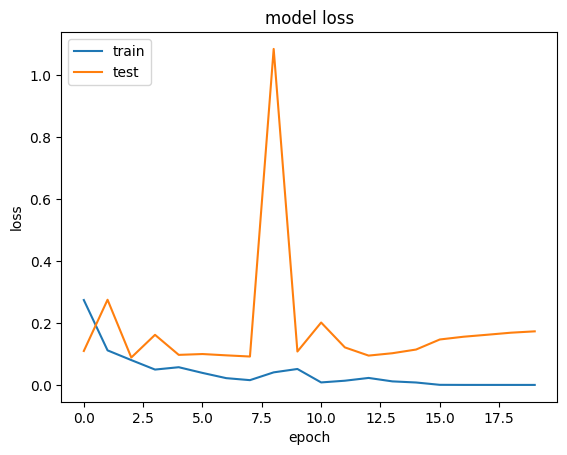

In [24]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

############ read Dataset
dir_file_path = "D:/UoH_PhD_Exp/Data/Data_HDF/Porosity_Balanced_Data.h5"
X, y = read_many_hdf5(0,dir_file_path)
print("Total X intences: " + str(X.shape))
print("Total y intences: " + str(len(y)))
my_class, my_count = np.unique(y, return_counts=True)
print("Total Non porosity images: " + str(my_count[0]))
print("Total porosity images: " + str(my_count[1]))

############ Ostu Binarization
X = ostu_thd(X)
print("X Shape after Ostu Binarisation: " + str(X.shape))
############ Train-Test Split + Data Pre processing
X_train, X_test, y_train, y_test = pre_process(X,y)
############ Model
model1 = model_3c3p1f2d1d()
############ Fit Model
#model.fit(samples_cnn, dataset.labels, epochs=epochs, batch_size=batch_size, verbose=1)
history6 = model1.fit(X_train, y_train, batch_size=10, epochs=20,verbose=1, validation_split=0.3)#, class_weight=my_class_weight)
print(history6)
########### Evaluate model
loss1, accuracy1 = model1.evaluate(X_test, y_test)
print('Test accuracy: %.2f' % (accuracy1))
print('Test loss: %.2f' % (loss1))
########## Classification Report
y_pred = model1.predict(X_test)
y_actual = np.argmax(y_test,axis=1)
print(y_actual[0:25])
y_pred = np.argmax(y_pred,axis=1)
print(y_pred[0:25])

print(classification_report(y_actual,y_pred))
print(confusion_matrix(y_actual,y_pred))
print(accuracy_score(y_actual,y_pred))

################# PLot Loss accuracy curves
loss_accuracy_curves(history6)